In [1]:
from os import getcwd
from os.path import abspath, join

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mpc
import numpy as np
import pickle

In [2]:
## set the matplotlib params
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.width'] = 0
mpl.rcParams['xtick.direction'] = 'inout'
mpl.rcParams['ytick.direction'] = 'inout'
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [3]:
data_dir = abspath(join(getcwd(), '../../'))

# params
hidden_size = np.array([50, 100, 400, 1000])
learning_rate = np.array([0.001, 0.01, 0.1])
n_epochs = 3001

#### MNIST

In [14]:
# load results with good params
t, l = 5, 2
with open(data_dir + '/models/results/initialize_mnist/full_data/clf_t=%0.2f_l=%0.2f.pickle' % (t, l), 'rb') as handle:
    results = pickle.load(handle)


# load results with bad params
t, l = 0.5, 0.5
with open(data_dir + '/models/results/initialize_mnist/full_data/clf_t=%0.2f_l=%0.2f.pickle' % (t, l), 'rb') as handle:
    results_mistuned = pickle.load(handle)
results['test_err']['mistuned'] = results_mistuned['test_err']['V1']
results['loss']['mistuned'] = results_mistuned['loss']['V1']

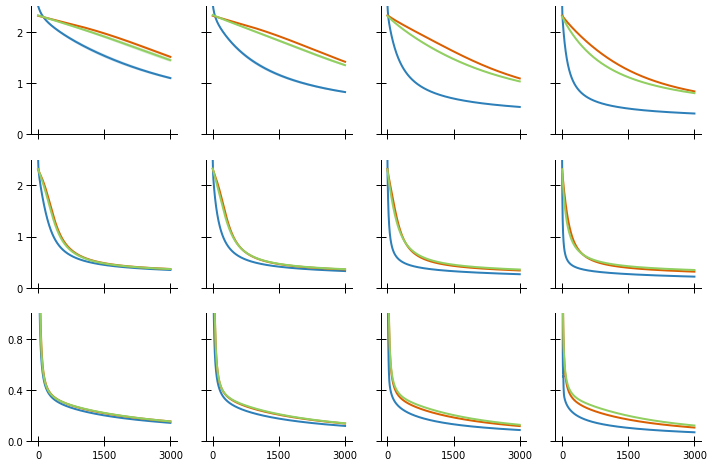

In [15]:
# plot loss
colors = {'V1': '#2c7fb8', 'He': '#d95f02', 'mistuned': '#91cf60'}

fig = plt.figure(figsize=(12, 8))
i = 0
for lr in learning_rate:
    for h in hidden_size:
        ax = fig.add_subplot(3, 4, i + 1)
        for key, col in colors.items():
            avg_loss = np.mean(results['loss'][key][h][lr], axis=0)
            std_loss = np.std(results['loss'][key][h][lr], axis=0) / np.sqrt(10)
            plt.plot(np.arange(n_epochs), avg_loss, lw=2, c=colors[key])
            plt.fill_between(np.arange(n_epochs), avg_loss - std_loss, avg_loss + std_loss, alpha=0.2)
#             print('%s, %0.4f' % (h, avg_loss[-1]))
#         plt.title((h, lr))
    
        ax.set_xticks(np.arange(0, 3001, 1500))
        if i < 4:
            plt.ylim([0, 2.5])
            ax.set_xticklabels([])
            ax.set_yticks(np.arange(0, 2.2, 1))
            if i % 4 != 0:
                ax.set_yticklabels([])
        
        elif i < 8:
            plt.ylim([0, 2.5])
            ax.set_yticks(np.arange(0, 2.2, 1))
            ax.set_xticklabels([])
            if i % 4 !=0:
                ax.set_yticklabels([])
        
        elif i < 12:
            plt.ylim([0, 1])
            ax.set_yticks(np.arange(0, 1.2, 0.4))
            if i % 4 !=0:
                ax.set_yticklabels([])
                
        i += 1
        
# plt.savefig(data_dir + '/reports/figures/paper_figs/supp_figs/init_SGD_mnist_loss.pdf', 
#             dpi=300, transparent=True, 
#             bbox_inches = 'tight', pad_inches = 0)

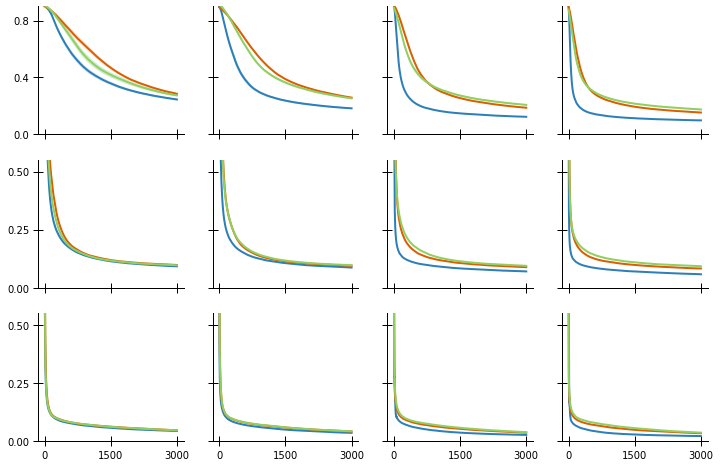

In [12]:
# plot test err
colors = {'V1': '#2c7fb8', 'He': '#d95f02', 'mistuned': '#91cf60'}

fig = plt.figure(figsize=(12, 8))
i = 0
for lr in learning_rate:
    for h in hidden_size:
        ax = fig.add_subplot(3, 4, i + 1)
        for key, col in colors.items():
            avg_loss = np.mean(results['test_err'][key][h][lr], axis=0)
            std_loss = np.std(results['test_err'][key][h][lr], axis=0) / np.sqrt(10)
            plt.plot(np.arange(n_epochs), avg_loss, lw=2, c=colors[key])
            plt.fill_between(np.arange(n_epochs), avg_loss - std_loss, avg_loss + std_loss, alpha=0.2)
#             print('%s, %0.4f' % (h, avg_loss[-1]))
#         plt.title((h, lr))
        
        ax.set_xticks(np.arange(0, 3001, 1500))
        if i < 4:
            plt.ylim([0, 0.9])
            ax.set_xticklabels([])
            ax.set_yticks(np.arange(0, 1, 0.4))
            if i % 4 != 0:
                ax.set_yticklabels([])
        
        elif i < 8:
            plt.ylim([0, 0.55])
            ax.set_yticks(np.arange(0, 0.55, 0.25))
            ax.set_xticklabels([])
            if i % 4 !=0:
                ax.set_yticklabels([])
        
        elif i < 12:
            plt.ylim([0, 0.55])
            ax.set_yticks(np.arange(0, 0.55, 0.25))
            if i % 4 !=0:
                ax.set_yticklabels([])
        
        i += 1
        
plt.savefig(data_dir + '/reports/figures/paper_figs/supp_figs/init_SGD_mnist_test_err.pdf', 
            dpi=300, transparent=True, 
            bbox_inches = 'tight', pad_inches = 0)

#### KMNIST

In [7]:
# load results with good params
t, l = 5, 2
with open(data_dir + '/models/results/initialize_kmnist/full_data/clf_t=%0.2f_l=%0.2f.pickle' % (t, l), 'rb') as handle:
    results = pickle.load(handle)


# load results with bad params
t, l = 0.5, 0.5
with open(data_dir + '/models/results/initialize_kmnist/full_data/clf_t=%0.2f_l=%0.2f.pickle' % (t, l), 'rb') as handle:
    results_mistuned = pickle.load(handle)
results['test_err']['mistuned'] = results_mistuned['test_err']['V1']
results['loss']['mistuned'] = results_mistuned['loss']['V1']

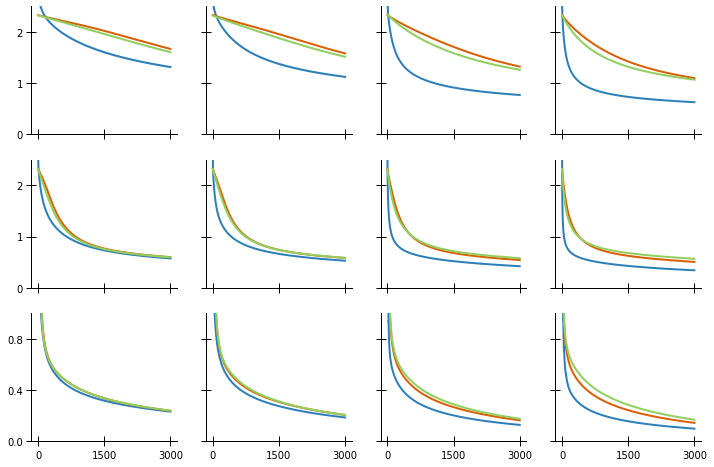

In [8]:
# plot loss
colors = {'V1': '#2c7fb8', 'He': '#d95f02', 'mistuned': '#91cf60'}

fig = plt.figure(figsize=(12, 8))
i = 0
for lr in learning_rate:
    for h in hidden_size:
        ax = fig.add_subplot(3, 4, i + 1)
        for key, col in colors.items():
            avg_loss = np.mean(results['loss'][key][h][lr], axis=0)
            std_loss = np.std(results['loss'][key][h][lr], axis=0) / np.sqrt(10)
            plt.plot(np.arange(n_epochs), avg_loss, lw=2, c=colors[key])
            plt.fill_between(np.arange(n_epochs), avg_loss - std_loss, avg_loss + std_loss, alpha=0.2)
#             print('%s, %0.4f' % (h, avg_loss[-1]))
#         plt.title((h, lr))
    
        ax.set_xticks(np.arange(0, 3001, 1500))
        if i < 4:
            plt.ylim([0, 2.5])
            ax.set_xticklabels([])
            ax.set_yticks(np.arange(0, 2.2, 1))
            if i % 4 != 0:
                ax.set_yticklabels([])
        
        elif i < 8:
            plt.ylim([0, 2.5])
            ax.set_yticks(np.arange(0, 2.2, 1))
            ax.set_xticklabels([])
            if i % 4 !=0:
                ax.set_yticklabels([])
        
        elif i < 12:
            plt.ylim([0, 1])
            ax.set_yticks(np.arange(0, 1.2, 0.4))
            if i % 4 !=0:
                ax.set_yticklabels([])
                
        i += 1
        
plt.savefig(data_dir + '/reports/figures/paper_figs/supp_figs/init_SGD_kmnist_loss.pdf', 
            dpi=300, transparent=True, 
            bbox_inches = 'tight', pad_inches = 0)

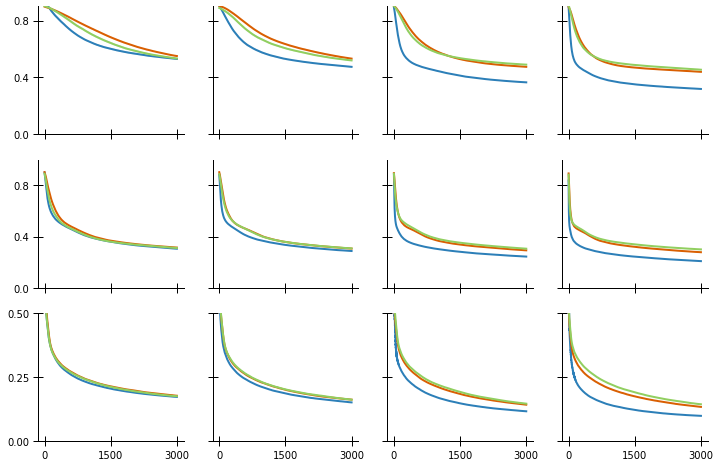

In [9]:
# plot test err
colors = {'V1': '#2c7fb8', 'He': '#d95f02', 'mistuned': '#91cf60'}

fig = plt.figure(figsize=(12, 8))
i = 0
for lr in learning_rate:
    for h in hidden_size:
        ax = fig.add_subplot(3, 4, i + 1)
        for key, col in colors.items():
            avg_loss = np.mean(results['test_err'][key][h][lr], axis=0)
            std_loss = np.std(results['test_err'][key][h][lr], axis=0) / np.sqrt(10)
            plt.plot(np.arange(n_epochs), avg_loss, lw=2, c=colors[key])
            plt.fill_between(np.arange(n_epochs), avg_loss - std_loss, avg_loss + std_loss, alpha=0.2)
#             print('%s, %0.4f' % (h, avg_loss[-1]))

        ax.set_xticks(np.arange(0, 3001, 1500))
        if i < 4:
            plt.ylim([0, 0.9])
            ax.set_xticklabels([])
            ax.set_yticks(np.arange(0, 1, 0.4))
            if i % 4 != 0:
                ax.set_yticklabels([])
        
        elif i < 8:
            plt.ylim([0, 1])
            ax.set_yticks(np.arange(0, 1, 0.4))
            ax.set_xticklabels([])
            if i % 4 !=0:
                ax.set_yticklabels([])
        
        elif i < 12:
            plt.ylim([0, 0.5])
            ax.set_yticks(np.arange(0, 0.55, 0.25))
            if i % 4 !=0:
                ax.set_yticklabels([])
        
        i += 1
        
plt.savefig(data_dir + '/reports/figures/paper_figs/supp_figs/init_SGD_kmnist_test_err.pdf', 
            dpi=300, transparent=True, 
            bbox_inches = 'tight', pad_inches = 0)